In [3]:
#1
#First, we start up our interface of choice and define a helper 
#function, whose purpose is to make a HTTP GET request to a 
#specified URL ("endpoint"), and verify that the response is 
#successful. If the response type is JSON, then automatically 
#decode it into a dict-like object.

import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [18]:
#Issue a request to the API root.
r = get(baseUrl) #>>>>

In [21]:
#The response is a dictionary object with one key, "simulations", 
#which is a list of N (currently 18 in this example) available runs:
r.keys() #>>>>
['simulations']



['simulations']

In [22]:
r.keys()

dict_keys(['simulations'])

In [23]:
#5
len(r['simulations']) #>>>>
#18

45

In [26]:
r['simulations'][0]
#Print out all fields of the first

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [27]:
names = [sim['name'] for sim in r['simulations']]
names
#Print out names of all sims

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG300-1-Subbox0']

In [28]:
#look at Illustris-3 by determining which entry in r it is, 
#then requesting the url field of that entry.
i = names.index('Illustris-3')
i

4

In [29]:
sim = get( r['simulations'][i]['url'] )
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [30]:
#10
sim['num_dm']

94196375

In [31]:
#Next, get the snapshot listing for this simulation.
sim['snapshots']

'http://www.tng-project.org/api/Illustris-3/snapshots/'

In [32]:
snaps = get( sim['snapshots'] )
len(snaps)

136

In [33]:
#There are 136 total snapshots, inspect the last one, 
#which corresponds to z=0.
snaps[-1]

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/'}

In [34]:
#Retrieve the full meta-data for this snapshot
snap = get( snaps[-1]['url'] )
snap

{'simulation': 'http://www.tng-project.org/api/Illustris-3/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 87571556,
 'num_dm': 94196375,
 'num_trmc': 94196375,
 'num_stars': 4388167,
 'num_bhs': 33582,
 'num_groups_fof': 131727,
 'num_groups_subfind': 121209,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 23437820660.0,
 'filesize_groupcat': 114056740.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/',
 'subhalos': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': '

In [35]:
#15
#Request and inspect the subhalos endpoint.
subs = get( snap['subhalos'] )
subs.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [36]:
subs['count']

121209

In [37]:
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=100&offset=100'

In [38]:
len(subs['results'])

100

In [40]:
#The response is a paginated (ordered) list of all 
#Subfind subhalos which exist at this snapshot. The 
#default page size is 100 elements, this can be overridden 
#by specifying a limit parameter.

subs = get( snap['subhalos'], {'limit':220} )
len(subs['results'])


220

In [41]:
#20
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=220&offset=220'

In [42]:
subs['results'][0]

{'id': 0,
 'sfr': 4.11098,
 'mass_log_msun': 14.554690443287308,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/0/'}

In [43]:
#Return order is arbitrary unless specified.
#Request the first twenty subhalos at this snapshot, 
#sorted by descending stellar mass.
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )
len(subs['results'])


20

In [45]:
[ subs['results'][i]['id'] for i in range(5) ]
#the most massive subhalo (with ID==0) also has the most 
#stars. The next ID (1030) is likely a central subhalo of 
#a subsequent FoF halo.

[0, 1030, 2074, 2302, 2843]

In [46]:
#get the full subhalo information for ID==1030.
sub = get( subs['results'][1]['url'] )
sub

{'snap': 135,
 'id': 1030,
 'bhmdot': 0.199144,
 'cm_x': 10992.8,
 'cm_y': 50807.7,
 'cm_z': 47671.3,
 'gasmetallicity': 0.00787963,
 'gasmetallicityhalfrad': 0.0167215,
 'gasmetallicitymaxrad': 0.053106,
 'gasmetallicitysfr': 0.0510764,
 'gasmetallicitysfrweighted': 0.0518217,
 'pos_x': 10908.2,
 'pos_y': 50865.5,
 'pos_z': 47651.8,
 'halfmassrad': 527.237,
 'halfmassrad_gas': 660.879,
 'halfmassrad_dm': 510.476,
 'halfmassrad_stars': 50.759,
 'halfmassrad_bhs': 0.0,
 'len': 1113373,
 'len_gas': 448911,
 'len_dm': 624445,
 'len_stars': 39946,
 'len_bhs': 71,
 'mass': 20463.1,
 'mass_gas': 2678.49,
 'mass_dm': 17620.2,
 'mass_stars': 158.333,
 'mass_bhs': 6.04079,
 'massinhalfrad': 496.772,
 'massinhalfrad_gas': 5.39936,
 'massinhalfrad_dm': 406.895,
 'massinhalfrad_stars': 79.1619,
 'massinhalfrad_bhs': 5.31633,
 'massinmaxrad': 5.28624,
 'massinmaxrad_gas': 0.007397,
 'massinmaxrad_dm': 0.0,
 'massinmaxrad_stars': 0.015315,
 'massinmaxrad_bhs': 5.26353,
 'massinrad': 1352.77,
 'massi

In [48]:
#25
#desc_sfid = -1 and desc_snap = -1 indicate that this subhalo 
#has no descendant in the SubLink trees (as expected, since 
#we are at z=0). On the other hand, prog_sfid = 1004 and 
#prog_snap = 134 indicate that the main progenitor of this 
#subhalo has ID 1004 at snapshot 134. 
#The related['sublink_progenitor'] link would take us 
#directly there.

#We also have id = 1030, a good sanity check. grnr = 2 
#indicates that this subhalo is a member of FoF 2. 
#primary_flag = 1 indicates that this is the central 
#(i.e. most massive, or "primary") subhalo of this FoF halo.

#Now we directly request a group catalog field dump of the 
#parent FoF halo.

url = sub['related']['parent_halo'] + "info.json"
url

'http://www.tng-project.org/api/Illustris-3/snapshots/135/halos/2/info.json'

In [49]:
parent_fof = get(url)
parent_fof.keys()

dict_keys(['SimulationName', 'SnapshotNumber', 'InfoType', 'InfoID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupFuzzOffsetType', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'StellarMasses', 'TracerLength', 'TracerOffset'])

In [52]:
#parent_fof['Group'] #the key names have changed from 
#'Group' in the tutorial to other specializations

#parent_fof['GroupBHMass'] #this is the right format
parent_fof['GroupNsubs']

366

In [ ]:
#The subhalos/N/info.json and halos/N/info.json endpoints 
#provide a raw extraction from the group catalogs, so the 
#fields are named accordingly.


In [53]:
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [57]:
#30
#request the main progenitor branch from the SubLink merger 
#trees of this subhalo.
import h5py
mpb1 = get( sub['trees']['sublink_mpb'] ) # file saved, mpb1 contains the filename

f = h5py.File(mpb1,'r')
#print f.keys() This gives an error. THe command works fien without print
f.keys()

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'Group_M_Crit200', 'Group_M_Mean200', 'Group_M_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetallicity', 'SubhaloStar

In [59]:
len(f['SnapNum'])

104

In [60]:
f['SnapNum'][:]

array([135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123,
       122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110,
       109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,  97,
        96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,  84,
        83,  82,  81,  80,  79,  78,  77,  76,  75,  74,  73,  72,  71,
        70,  69,  68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,
        57,  56,  55,  54,  53,  52,  51,  50,  49,  48,  47,  46,  45,
        44,  43,  42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32],
      dtype=int16)

In [62]:
f.close()

In [83]:
mpb2 = get( sub['trees']['lhalotree_mpb'] ) 
# file saved, mpb2 contains the filename
with h5py.File(mpb2,'r') as f:
    #len(f['SnapNum'])
    #len(f['SnapNum'])
    print(len(f['SnapNum']))

104


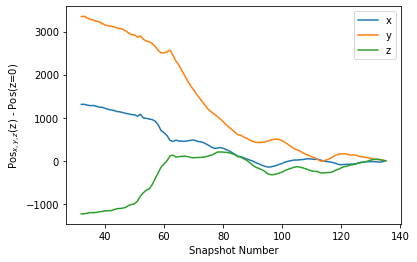

In [104]:
#35 
import matplotlib.pyplot as plt
with h5py.File(mpb2,'r') as f:
     pos = f['SubhaloPos'][:]
     snapnum = f['SnapNum'][:]
     subid = f['SubhaloNumber'][:]
 
     for i in range(3):
        mpl.plot(snapnum,pos[:,i] - pos[0,i], label=['x','y','z'][i])
plt.legend() 
plt.xlabel('Snapshot Number')
plt.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)');
#call id is mpl, so using plt gives error. 
#Either import as plt or call as mpl.

In [105]:
#Finally, let's get an actual cutout of snapshot data. 
#Our goal: an image of the gas density around the z=1
#progenitor of our subhalo.

#First, what is the snapshot we are looking for?
url = sim['snapshots'] + "z=1/"
url

'http://www.tng-project.org/api/Illustris-3/snapshots/z=1/'

In [106]:
snap = get(url)
snap['number'], snap['redshift']

(85, 0.9972942257819399)

In [107]:
#Find the target Subfind ID at snapshot 85 using the 
#Sublink tree.
import numpy as np
#import numpy before calling
i = np.where(snapnum == 85)
subid[i]

array([185])

In [108]:
#Request the subhalo details, and a snapshot cutout consisting 
#only of Gas fields Coordinates,Masses.
sub_prog_url = "http://www.tng-project.org/api/Illustris-3/snapshots/85/subhalos/185/"
sub_prog = get(sub_prog_url)
sub_prog['pos_x'], sub_prog['pos_y']

(11013.3, 51469.6)

In [109]:
#40
cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)

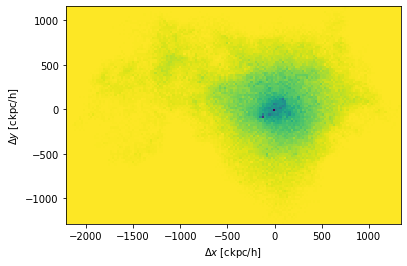

In [110]:
#Make a quick 2d histogram visualization of the distribution 
#of gas bound to this subhalo, weighted by the log of gas cell 
#mass, and with position relative to the subhalo center.

with h5py.File(cutout,'r') as f:
     x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
     y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
     dens = np.log10(f['PartType0']['Masses'][:])
 
plt.hist2d(x,y,weights=dens,bins=[150,100])
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]');

****API Cookbook Starts Here!****

In [112]:
#Examples for how to accomplish specific tasks, covering 
#some different API response formats.

#Each example is independent, although we will use this 
#helper function to reduce verbosity:

def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


In [113]:
#Task 1: for Illustris-1 at z=0, get all the fields available 
#for the subhalo with id=0 and print its total mass and 
#stellar half mass radius.

url = "http://www.tng-project.org/api/Illustris-1/snapshots/135/subhalos/0/"
r = get(url)
r['mass']

22174.8

In [114]:
#45
r['halfmassrad_stars']

72.0388

In [119]:
#Task 2: for Illustris-1 at z=2, search for all subhalos 
#with total mass 10^(11.9)M_⊙<M<10^(12.1)M_⊙, print the number 
#returned, and the Subfind IDs of the first five results 
#(arbitrarily ordered, you may get different ids).

# first convert log solar masses into group catalog units
mass_min = 10**11.9 / 1e10 * 0.704
mass_max = 10**12.1 / 1e10 * 0.704

# form the search_query string by hand for once
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max)
search_query

'?mass__gt=55.920707724589455&mass__lt=88.6283489903093'

In [120]:
# form the url and make the request
url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + search_query
subhalos = get(url)
subhalos['count']

550

In [121]:
ids = [ subhalos['results'][i]['id'] for i in range(5) ]
ids


[1, 1352, 5525, 6574, 12718]

In [127]:
#Task 3: for Illustris-1 at z=2, retrieve all fields for 
#five specific Subfind IDs 
#(from above: 109974, 110822, 123175, 107743, 95711), 
#print the stellar mass and number of star particles in each.

ids = [109974, 110822, 123175, 107743, 95711]
for id in ids:
     url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
     subhalo = get(url)
     print(id, subhalo['mass_stars'], subhalo['len_stars'])


109974 0.283605 7270
110822 0.41813 5820
123175 0.529888 11362
107743 0.648827 10038
95711 0.623781 12722


In [128]:
#50
#This is an additional run for the original values I got from 
#running cell 48
#this cell is not included in the original text, and is mainly
#for personal experimentation.

ids = [1, 1352, 5525, 6574, 12718]
for id in ids:
     url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
     subhalo = get(url)
     print(id, subhalo['mass_stars'], subhalo['len_stars'])

1 3.44785 54286
1352 3.14618 47648
5525 2.93244 45252
6574 3.73319 58277
12718 3.77762 57532


In [130]:
#Task 4: for Illustris-1 at z=2, for five specific Subfind 
#IDs (from above (cell 49): 109974, 110822, 123175, 107743, 95711), 
#extract and save full cutouts from the snapshot (HDF5 format).

ids = [109974, 110822, 123175, 107743, 95711]
 
for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id) + "/cutout.hdf5"
    saved_filename = get(url)
    print(id, saved_filename)

109974 cutout_109974.hdf5
110822 cutout_110822.hdf5
123175 cutout_123175.hdf5
107743 cutout_107743.hdf5
95711 cutout_95711.hdf5


In [131]:
#Task 5: for Illustris-1 at z=2, for five specific Subfind 
#IDs (from above: 109974, 110822, 123175, 107743, 95711), 
#extract and save only star particles from the parent FoF 
#halo of each subhalo.

ids = [109974, 110822, 123175, 107743, 95711]
params = {'stars':'all'}

for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
    sub = get(url)
    saved_filename = get(sub['cutouts']['parent_halo'],params)
    print(sub['id'], sub['grnr'], saved_filename)

109974 745 cutout_745.hdf5
110822 758 cutout_758.hdf5
123175 971 cutout_971.hdf5
107743 711 cutout_711.hdf5
95711 548 cutout_548.hdf5


In [148]:
#Task 6: for Illustris-1 at z=2 for Subfind ID 109974, 
#get a cutout including only the positions and metallicities 
#of stars, and calculate the mean stellar metallicity in 
#solar units within the annuli 3kpc<r<5kpc (proper) centered 
#on the fiducial subhalo position.

import h5py
import numpy as np

id = 109974
redshift = 2.0
params = {'stars':'Coordinates,GFM_Metallicity'}

scale_factor = 1.0 / (1+redshift)
little_h = 0.704
solar_Z = 0.0127

url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties
saved_filename = get(url + "/cutout.hdf5",params) # get and save HDF5 cutout file

with h5py.File(saved_filename) as f:
    # NOTE! If the subhalo is near the edge of the box, you must take the periodic boundary into account! (we ignore it here)
    dx = f['PartType4']['Coordinates'][:,0] - sub['pos_x']
    dy = f['PartType4']['Coordinates'][:,1] - sub['pos_y']
    dz = f['PartType4']['Coordinates'][:,2] - sub['pos_z']
    metals = f['PartType4']['GFM_Metallicity'][:]
    mode = r   

    rr = np.sqrt(dx**2 + dy**2 + dz**2)
    rr *= scale_factor/little_h # ckpc/h -> physical kpc

    w = np.where( (rr >= 3.0) & (rr < 5.0) )    
    print(np.mean( metals[w] ) / solar_Z)
    
    ###Copy of Warning Message:###
    #C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:22: 
    #H5pyDeprecationWarning: The default file mode will change 
    #to 'r' (read-only) in h5py 3.0. To suppress this warning, 
    #pass the mode you need to h5py.File(), or set the global 
    #default h5.get_config().default_file_mode, or set the 
    #environment variable H5PY_DEFAULT_READONLY=1. Available 
    #modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for 
    #details.

0.24839260388077714


C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:22: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.


In [166]:
#Task 8: for Illustris-1 at z=2, for five specific Subfind 
#IDs (from above: 109974, 110822, 123175, 107743, 95711), 
#locate the z=0 descendant of each by using the API to walk 
#down the SubLink descendant links.

ids = [109974, 110822, 123175, 107743, 95711]
#z0_descendant_ids = [-1]*len(ids)
z0_descendant_ids = [-1]*len(ids)

for i,id in enumerate(ids):
    start_url = "http://www.tng-project.org/api/Illustris-1/snapshots/68/subhalos/" + str(id)
    sub = get(start_url)
    
    while sub['desc_sfid'] != -1:
        # request the full subhalo details of the descendant by following the sublink URL
        sub = get(sub['related']['sublink_descendant'])
        if sub['snap'] == 135:
            z0_descendant_ids[i] = sub['id']
            
if z0_descendant_ids[i] >= 0:
    print('Descendant of ' + str(id) + ' at z=0 is ' + str(z0_descendant_ids[i]))
else:
    print('Descendant of ' + str(id) + ' not followed to z=0!')

Descendant of 95711 at z=0 is 260067


C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


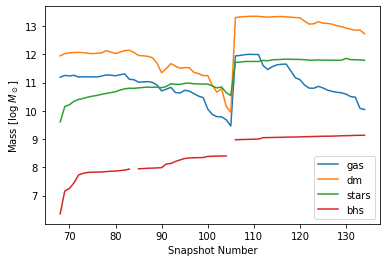

In [160]:
#55
#Task 9: for Illustris-1 at z=2 track Subfind ID 109974 to z=0,
#using the API to walk down the SubLink descendant links, and 
#plot the mass evolution of each component (gas, dark matter, 
#stars, and black holes).

id = 109974
url = "http://www.tng-project.org/api/Illustris-1/snapshots/68/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties

# prepare dict to hold result arrays
fields = ['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']
r = {}
for field in fields:
    r[field] = []

while sub['desc_sfid'] != -1:
    for field in fields:
        r[field].append(sub[field])
    # request the full subhalo details of the descendant by following the sublink URL
    sub = get(sub['related']['sublink_descendant'])

# make a plot (notice our subhalo falls into a much more massive halo around snapshot 105)
for partType in ['gas','dm','stars','bhs']:
    mass_logmsun = np.log10( np.array(r['mass_'+partType])*1e10/0.704)
    plt.plot(r['snap'],mass_logmsun,label=partType)

plt.xlabel('Snapshot Number')
plt.ylabel('Mass [log $M_\odot$]')
plt.legend(loc='lower right');

#C:\Users\debos\anaconda3\lib\site-packages\ipykernel_launcher.
#py:25: RuntimeWarning: divide by zero encountered in log10

In [190]:
#Task 10: for Illustris-1 at z=0, check if pre-rendered mock 
#stellar images exist for five specific Subfind IDs (the 
#descendants from above: 41092, 338375, 257378, 110568, 260067). 
#If so, download and display the PNGs.

import matplotlib.image as mpimg

#I tried a bunch of stuff from
#https://stackoverflow.com/questions/11914472/stringio-in-python3
#StringIO doesn't exist for Python 3.
#Imported numpy again because code kept breaking w/o it.

import numpy as np
from io import StringIO
import io

#from io import BytesIO
#from io import StringIO
###from StringIO import StringIO###original

ids = [41092,338375,257378,110568,260067]

sub_count = 1
plt.figure(figsize=[15,3])

for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(id)
    sub = get(url)
    
    # it is of course possible this data product does not exist for all requested subhalos
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1
        
        # plot the PNG binary data directly, without actually saving a .png file
        file_object = StringIO(response.content)
        plt.imshow(mpimg.imread(file_object))
        
#too many redirects, exceeds 30 redirects. Has the site address
#changed? Can't get headers to reset.Check out link below:
#https://stackoverflow.com/questions/42237672/python-toomanyredirects-exceeded-30-redirects

TooManyRedirects: Exceeded 30 redirects.

<Figure size 1080x216 with 0 Axes>

In [ ]:
#Task 11: download the entire Illustris-1 z=0 snapshot 
#including only the positions, masses, and metallicities of 
#stars (in the form of 512 HDF5 files).

base_url = "http://www.tng-project.org/api/Illustris-1/"
sim_metadata = get(base_url)
params = {'stars':'Coordinates,Masses,GFM_Metallicity'}

for i in range(sim_metadata['num_files_snapshot']):
    file_url = base_url + "files/snapshot-135." + str(i) + ".hdf5"
    saved_filename = get(file_url, params)
    print(saved_filename)

snap_135.0.hdf5
snap_135.1.hdf5
snap_135.2.hdf5
snap_135.3.hdf5
snap_135.4.hdf5
snap_135.5.hdf5
snap_135.6.hdf5
snap_135.7.hdf5
snap_135.8.hdf5
